In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv ('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# encoding dengan methode OneHotEncoder
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True, dtype=int)

charges = data['charges']
data = data.drop(columns='charges')

data = pd.concat([data, charges], axis=1)
# show 10 data after encode
data.head(10)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,0,1,0,0,1,16884.92400
1,18,33.770,1,1,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,1,0,4449.46200
3,33,22.705,0,1,0,1,0,0,21984.47061
4,32,28.880,0,1,0,1,0,0,3866.85520
5,31,25.740,0,0,0,0,1,0,3756.62160
6,46,33.440,1,0,0,0,1,0,8240.58960
7,37,27.740,3,0,0,1,0,0,7281.50560
8,37,29.830,2,1,0,0,0,0,6406.41070
9,60,25.840,0,0,0,1,0,0,28923.13692


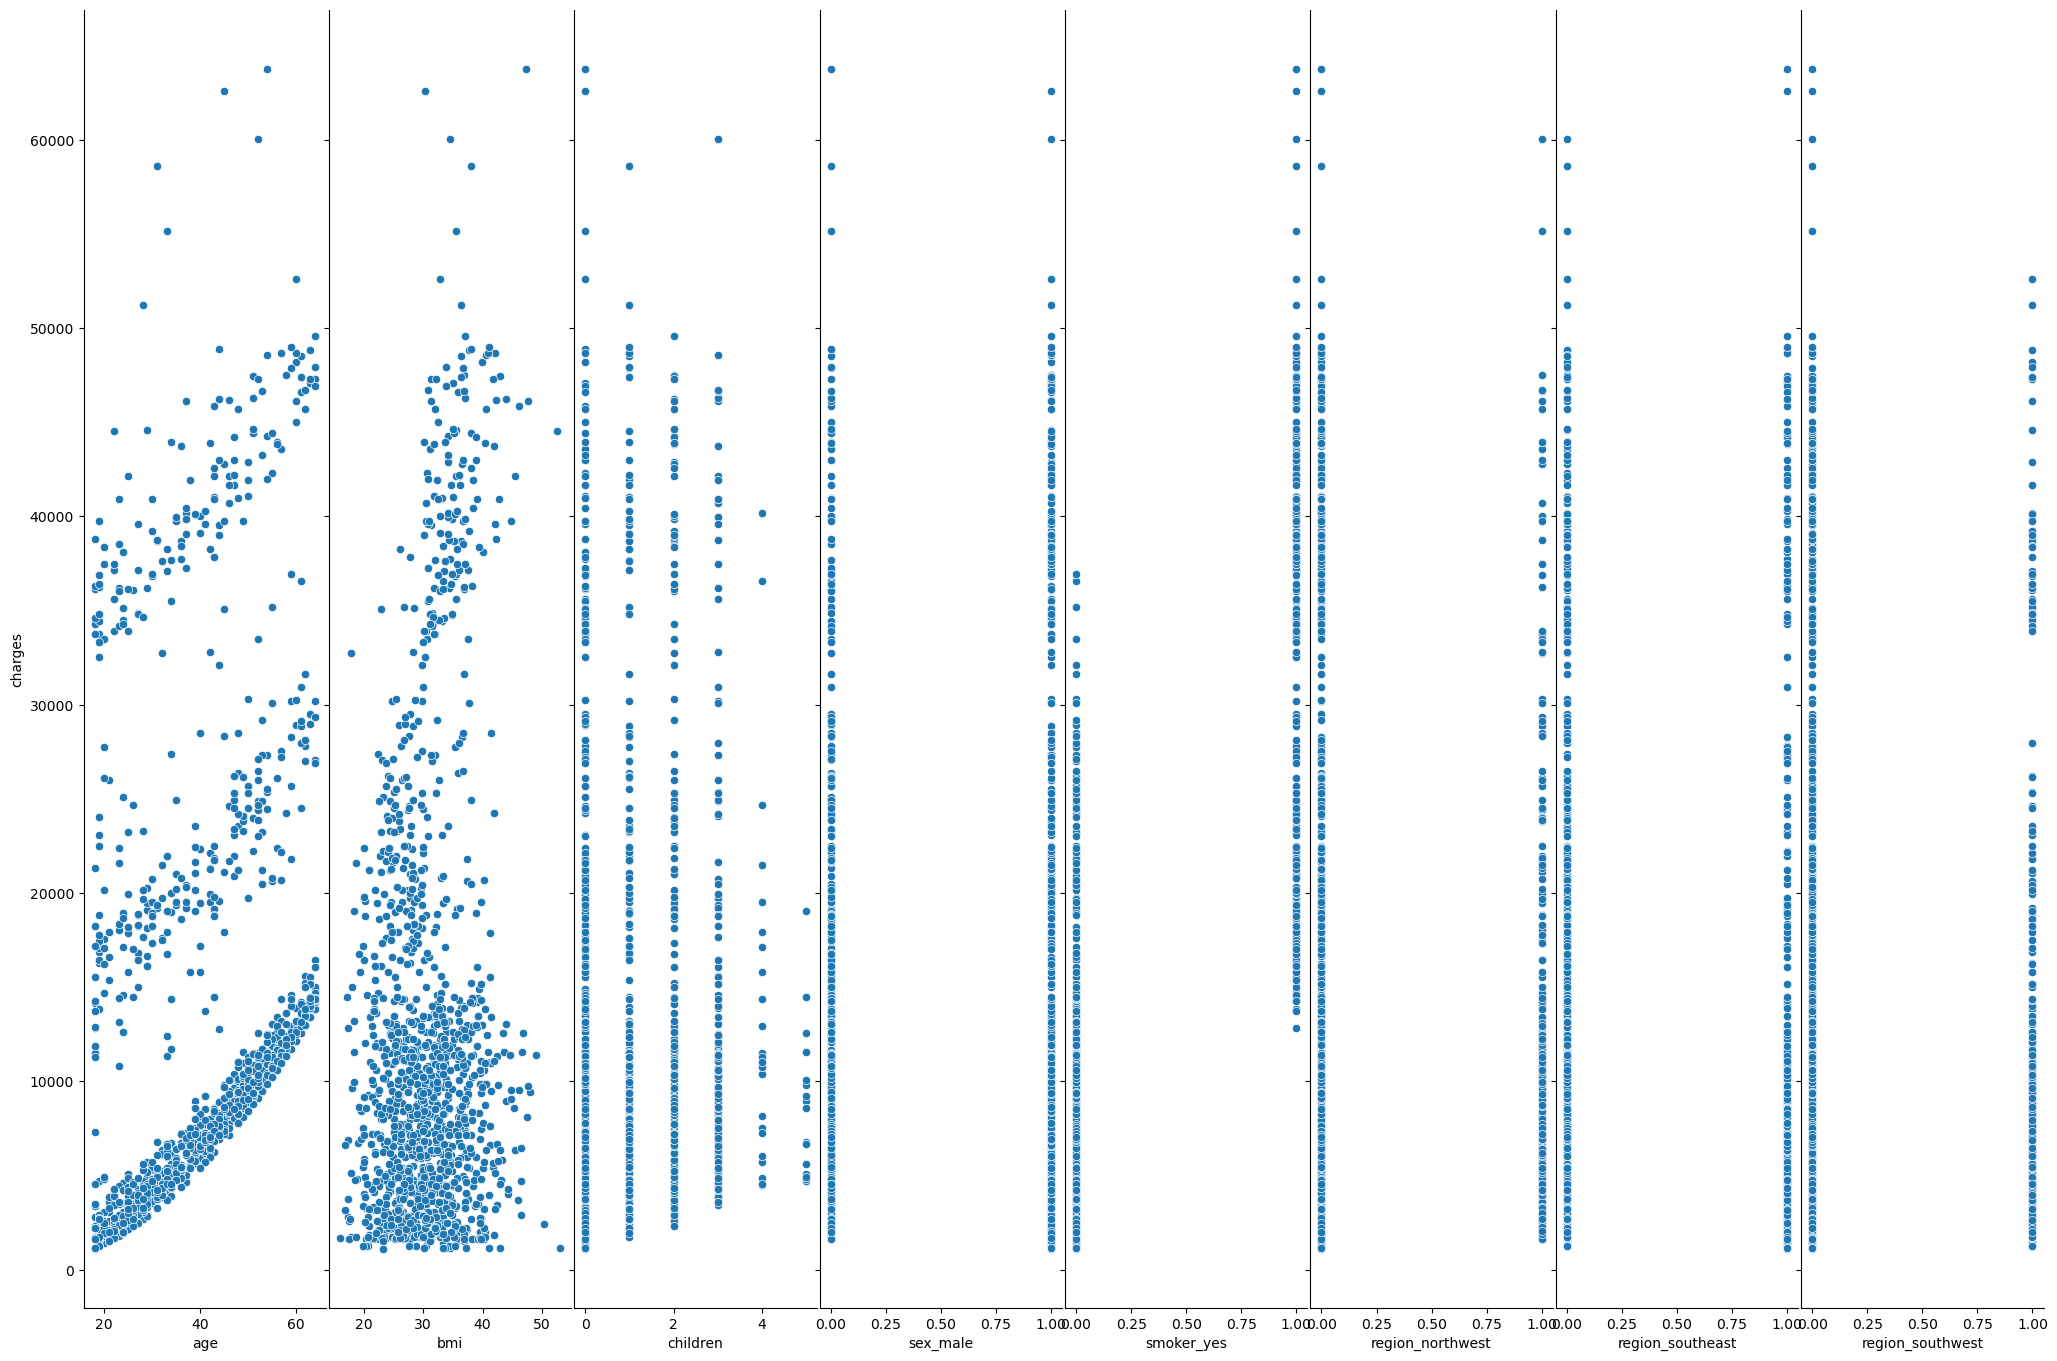

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data, x_vars=data.columns[data.columns != 'charges'].to_list(), y_vars='charges', height=5, aspect=2, kind='scatter').fig.set_size_inches(20, 15)
plt.subplots_adjust(right=1)
plt.show()

In [14]:
X = data[['age', 'bmi', 'smoker_yes']]
y = data['charges']

print(f'X: \n {X} \n\n y: \n {y}')

X: 
       age     bmi  smoker_yes
0      19  27.900           1
1      18  33.770           0
2      28  33.000           0
3      33  22.705           0
4      32  28.880           0
...   ...     ...         ...
1333   50  30.970           0
1334   18  31.920           0
1335   18  36.850           0
1336   21  25.800           0
1337   61  29.070           1

[1338 rows x 3 columns] 

 y: 
 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [15]:
from sklearn.preprocessing import StandardScaler
# create different object for each column
# we do this, because scale each column vastly different
sc_X_age = StandardScaler()
sc_X_bmi = StandardScaler()
sc_X_smoker_yes = StandardScaler()
sc_y = StandardScaler()

# convert X data from int64 to float
# because FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas.
X = X.astype(float)

# fit and transform each column
X.loc[:, 'age'] = sc_X_age.fit_transform(X[['age']])
X.loc[:, 'bmi'] = sc_X_bmi.fit_transform(X[['bmi']])
X.loc[:, 'smoker_yes'] = sc_X_smoker_yes.fit_transform(X[['smoker_yes']])
y = sc_y.fit_transform(y.values.reshape(-1, 1))
y = y.ravel()

# Print the scaled features and target variable
print(f'X (scaled): \n{X} \n\n y (scaled): \n{y}')

X (scaled): 
           age       bmi  smoker_yes
0    -1.438764 -0.453320    1.970587
1    -1.509965  0.509621   -0.507463
2    -0.797954  0.383307   -0.507463
3    -0.441948 -1.305531   -0.507463
4    -0.513149 -0.292556   -0.507463
...        ...       ...         ...
1333  0.768473  0.050297   -0.507463
1334 -1.509965  0.206139   -0.507463
1335 -1.509965  1.014878   -0.507463
1336 -1.296362 -0.797813   -0.507463
1337  1.551686 -0.261388    1.970587

[1338 rows x 3 columns] 

 y (scaled): 
[ 0.2985838  -0.95368917 -0.72867467 ... -0.96159623 -0.93036151
  1.31105347]


In [16]:
from sklearn.model_selection import train_test_split
# split data into training and test data with ratio 80% training : 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check Count each of the Variables
print(f'Count of Original Independent Variable: {X.shape[0]}')
print(f'Count of Training Independent Variable: {X_train.shape[0]}')
print(f'Count of Testing Independent Variable: {X_test.shape[0]}')
print(f'Count of Original Dependent Variable: {y.shape[0]}')
print(f'Count of Training Dependent Variable: {y_train.shape[0]}')
print(f'Count of Testing Dependent Variable: {y_test.shape[0]}')

Count of Original Independent Variable: 1338
Count of Training Independent Variable: 1070
Count of Testing Independent Variable: 268
Count of Original Dependent Variable: 1338
Count of Training Dependent Variable: 1070
Count of Testing Dependent Variable: 268


In [10]:
from sklearn.model_selection import train_test_split
# split data into training and test data with ratio 80% training : 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check Count each of the Variables
print(f'Count of Original Independent Variable: {X.shape[0]}')
print(f'Count of Training Independent Variable: {X_train.shape[0]}')
print(f'Count of Testing Independent Variable: {X_test.shape[0]}')
print(f'Count of Original Dependent Variable: {y.shape[0]}')
print(f'Count of Training Dependent Variable: {y_train.shape[0]}')
print(f'Count of Testing Dependent Variable: {y_test.shape[0]}')

Count of Original Independent Variable: 1338
Count of Training Independent Variable: 1070
Count of Testing Independent Variable: 268
Count of Original Dependent Variable: 1338
Count of Training Dependent Variable: 1070
Count of Testing Dependent Variable: 268


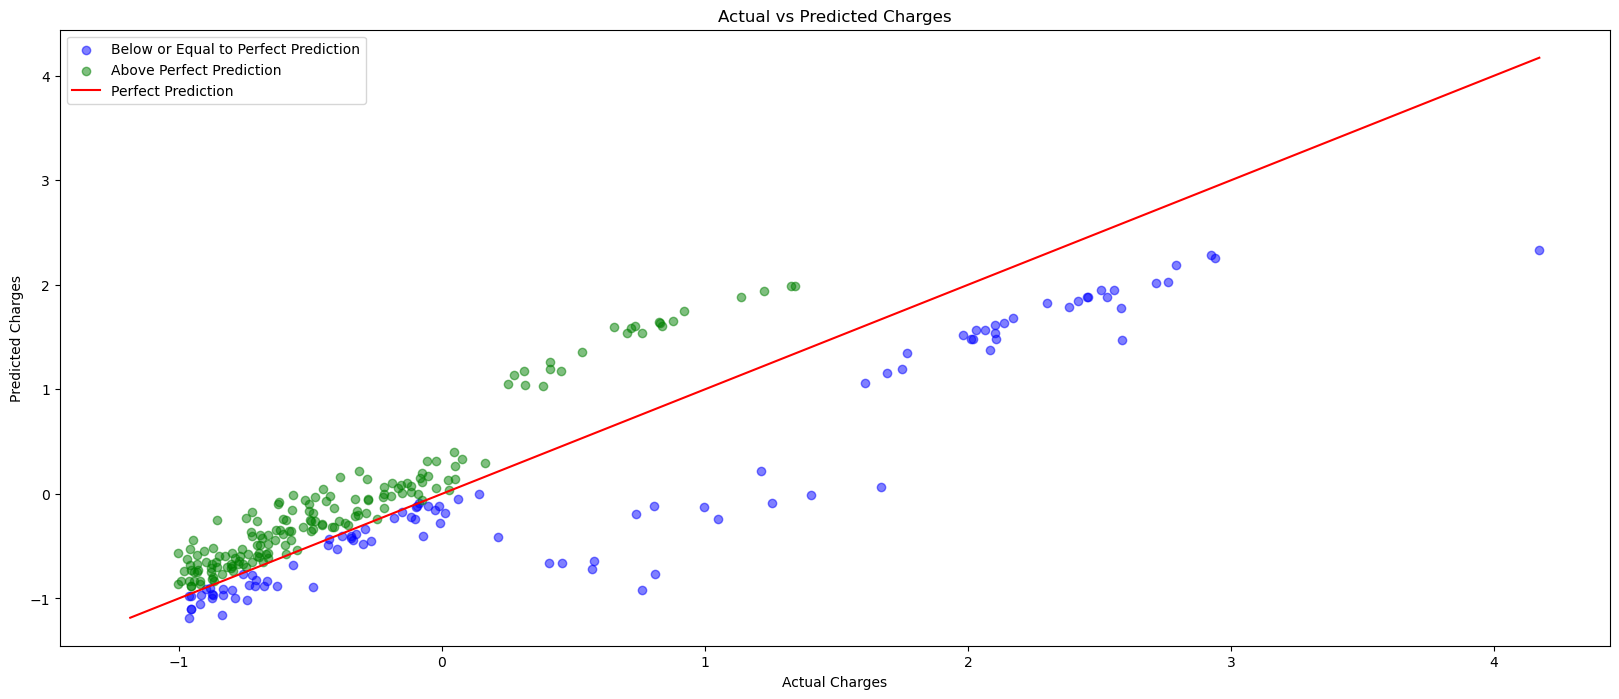

In [17]:
from sklearn.linear_model import LinearRegression
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X_train, y_train)

# Predict on the test set
y_pred_mlr = multiple_linear_regression.predict(X_test)

# Visualizing the regression line with multiple features isn't as straightforward,
# but you can plot the actual vs. predicted values for the training set.
# Visualize actual vs. predicted values for the test set
# Scatter plot for Actual vs Predicted values
plt.figure(figsize=(20, 8))

# Calculate perfect prediction line
max_value = max(max(y_test), max(y_pred_mlr))
min_value = min(min(y_test), min(y_pred_mlr))

# Scatter plot for Actual vs Predicted values
# Below the perfect prediction line
below_line = y_pred_mlr <= y_test
plt.scatter(y_test[below_line], y_pred_mlr[below_line], color='blue', alpha=0.5, label='Below or Equal to Perfect Prediction')

# Above the perfect prediction line
above_line = y_pred_mlr > y_test
plt.scatter(y_test[above_line], y_pred_mlr[above_line], color='green', alpha=0.5, label='Above Perfect Prediction')

# Plot a line representing perfect prediction (y = x)
plt.plot([min_value, max_value], [min_value, max_value], color='red', label='Perfect Prediction')

# show result
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.show()

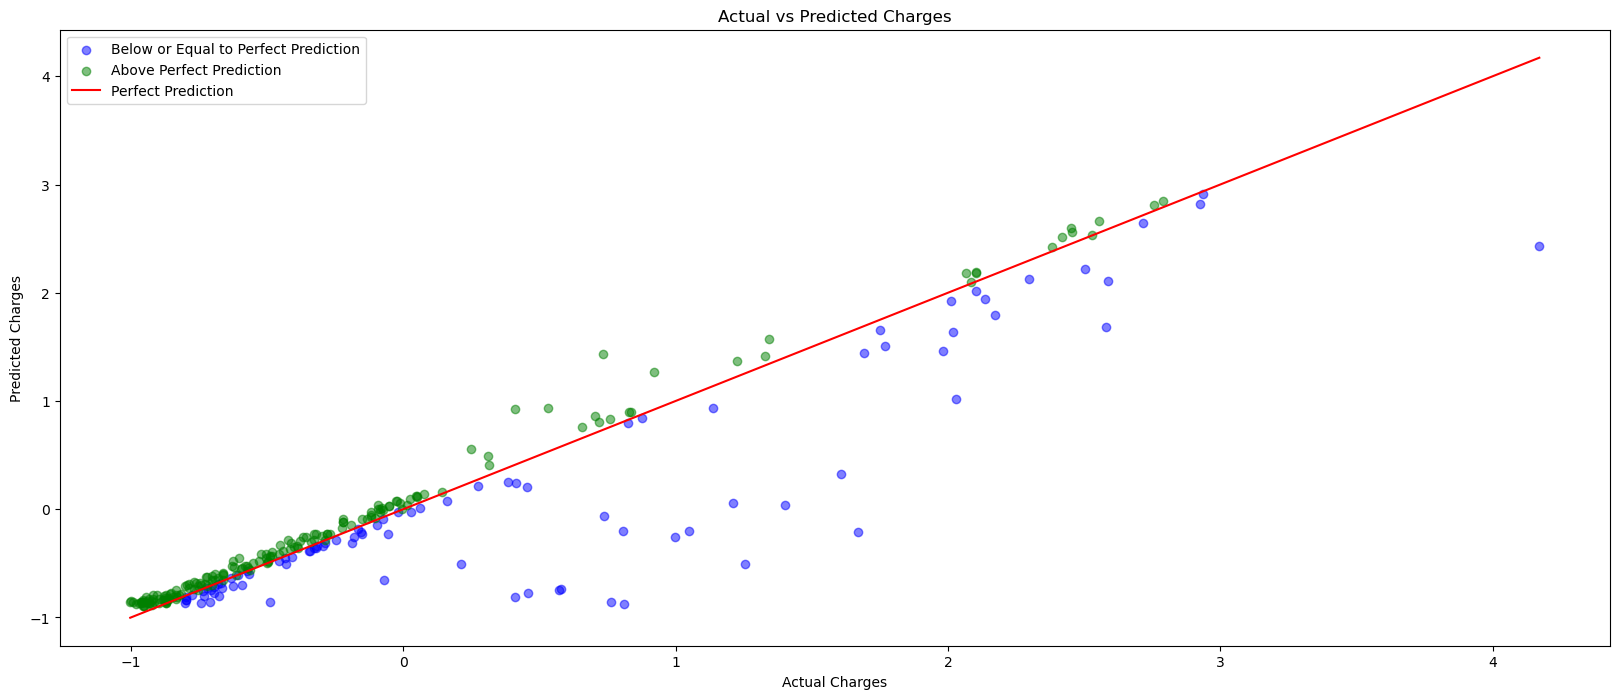

In [20]:
from sklearn.svm import SVR
support_vector_regression = SVR(kernel='rbf')
support_vector_regression.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = support_vector_regression.predict(X_test)

# Visualize actual vs. predicted values for the test set
# Scatter plot for Actual vs Predicted values
plt.figure(figsize=(20, 8))

# Calculate perfect prediction line
max_value = max(max(y_test), max(y_pred_svr))
min_value = min(min(y_test), min(y_pred_svr))

# Scatter plot for Actual vs Predicted values
# Below the perfect prediction line
below_line = y_pred_svr <= y_test
plt.scatter(y_test[below_line], y_pred_svr[below_line], color='blue', alpha=0.5, label='Below or Equal to Perfect Prediction')

# Above the perfect prediction line
above_line = y_pred_svr > y_test
plt.scatter(y_test[above_line], y_pred_svr[above_line], color='green', alpha=0.5, label='Above Perfect Prediction')

# Plot a line representing perfect prediction (y = x)
plt.plot([min_value, max_value], [min_value, max_value], color='red', label='Perfect Prediction')

# show result
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
# evaluate multiple linear regression model
r2_mlr = r2_score(y_test, y_pred_mlr)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
rmse_mlr = np.sqrt(mse_mlr)
mae_mlr = mean_absolute_error(y_test, y_pred_mlr)

# evaluate support vector regression model
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# Print the evaluation metrics and compare Multiple Linear Regression and Support Vector Regression
print(f'MAE: \nMultiple Linear Regression: {mae_mlr} \nSupport Vector Regression: {mae_svr}')
print(f'\nMSE: \nMultiple Linear Regression: {mse_mlr} \nSupport Vector Regression: {mse_svr}')
print(f'\nRMSE: \nMultiple Linear Regression: {rmse_mlr} \nSupport Vector Regression: {rmse_svr}')
print(f'\nR2 Score: \nMultiple Linear Regression: {r2_mlr} \nSupport Vector Regression: {r2_svr}')

MAE: 
Multiple Linear Regression: 0.351952862665193 
Support Vector Regression: 0.17318836211481173

MSE: 
Multiple Linear Regression: 0.2355138005515096 
Support Vector Regression: 0.14092001899988077

RMSE: 
Multiple Linear Regression: 0.48529764119714164 
Support Vector Regression: 0.3753931525745785

R2 Score: 
Multiple Linear Regression: 0.7776932310583375 
Support Vector Regression: 0.8669824272305882
